

# Project: Investigate a Dataset (Tmdb Movie Data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project i am going to analyse dataset of a group of movies with different genres collected from The Movie Database (TMDb). In total this data set has a lot of properties to help us .
Through our analysis we will try to answer some important questions relating to this data set.

### Questions :
1. what is the relation between runtime and popularity ?  
2. Which genres are most interesting ?
3. what are the best movies which have the highest revenue ?  




In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
import IPython



<a id='wrangling'></a>
## Data Wrangling

Data wrangling is the process of gathering, selecting, and transforming data to answer an analytical question. Also known as data cleaning or “munging” . 

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
#show the original data
df.head(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
#display the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#display number of rows and coloumns
df.shape

(10866, 21)

In [6]:
#display some statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# making a copy of the dataset
cp_df = df.copy()

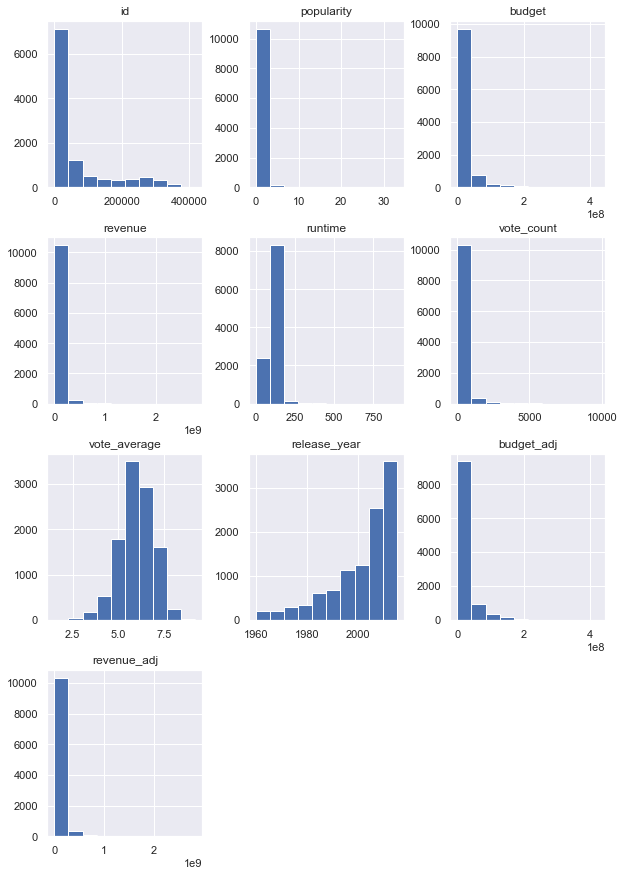

In [8]:
df.hist(figsize=(10,15));


After going through the dataset we decide to make some of observations.
1) Some columns are not essential for our data analysis and  we will remove them.
     *homepage
     *tagline
     *keywords
     *overview
     *imdb_id
     *production_companies
     *director
     *cast
     *budget
     *revenue
     *release date
     *vote count
     
2) NaN and 0 values
    df.info() and df.describe() indicates there are a lot of columns with null and zero values hence we will have to    
    handle them.
    
3)  Genres column has multiple values in some rows seprated by ' | '
    We will seprate the values and consider the first value as the genre of the movie
    
4)  delete duplicated rows
     

###  Cleaning Data

In [9]:
# Here we are removing columns not essential 
df.drop(['director','cast','homepage','tagline','keywords','overview','imdb_id','production_companies','budget','revenue','release_date','vote_count'],axis=1,inplace=True)

df.head()

,id,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,7.3,2015,174799923.1,1.385749e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   runtime         10866 non-null  int64  
 4   genres          10843 non-null  object 
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
 7   budget_adj      10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


In [11]:
#drop NAN values
df['genres'].replace(0, np.NAN, inplace=True)
df.dropna(axis=0, inplace=True)

In [12]:
# Checking the data to ensure there are no NAN rows with 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   original_title  10843 non-null  object 
 3   runtime         10843 non-null  int64  
 4   genres          10843 non-null  object 
 5   vote_average    10843 non-null  float64
 6   release_year    10843 non-null  int64  
 7   budget_adj      10843 non-null  float64
 8   revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 847.1+ KB


In [13]:
df.describe()

,id,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,102.137508,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,91977.394803,1.000986,31.293320,0.934260,12.813298,3.433299e+07,1.447664e+08
min,5.000000,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.500000,0.208253,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,111.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,417859.000000,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
#replacing 0 values in columns runtime, budget_adj and revenue_adj with their  means
df['runtime'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df.fillna(df.mean(), inplace=True)

In [15]:
df.head()

,id,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,119.0,Adventure|Science Fiction|Thriller,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,137.0,Action|Crime|Thriller,7.3,2015,174799923.1,1.385749e+09


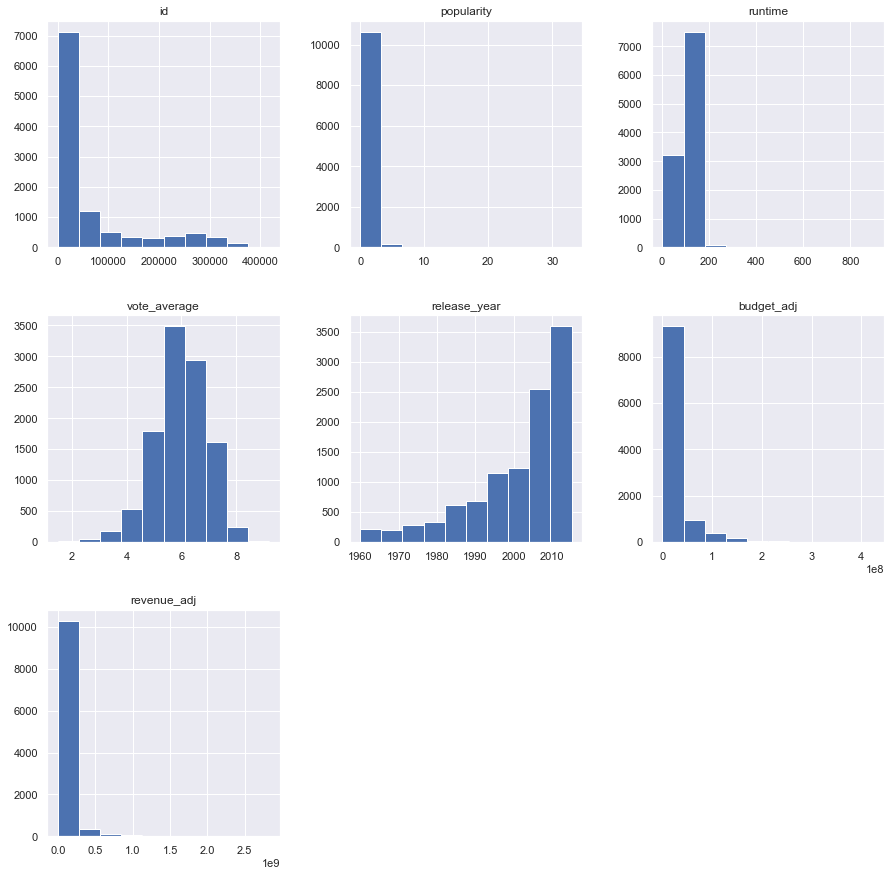

In [16]:
df.hist(figsize=(15,15));

In [17]:
df.shape

(10843, 9)

In [18]:
df.describe()

,id,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,102.420882,5.973974,2001.315595,3.689487e+07,1.150774e+08
std,91977.394803,1.000986,30.827360,0.934260,12.813298,2.896814e+07,1.329779e+08
min,5.000000,0.000065,2.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10589.500000,0.208253,90.000000,5.400000,1995.000000,2.445229e+07,5.839492e+07
50%,20558.000000,0.384555,99.000000,6.000000,2006.000000,3.689487e+07,1.150774e+08
75%,75182.000000,0.715349,111.000000,6.600000,2011.000000,3.689487e+07,1.150774e+08
max,417859.000000,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [19]:
# seprating values in genres column seprated by '|' and taking only the first value 
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_genres
#replacing genres column with genres_1
df['genres']=df_genres['genres_1']
df.head()

,id,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124.0,Action,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120.0,Action,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,119.0,Adventure,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136.0,Action,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,137.0,Action,7.3,2015,174799923.1,1.385749e+09


In [20]:
#show sum of duplicated data
df.duplicated().sum()

1

In [21]:
#delete duplicated
df.drop_duplicates(inplace= True )

In [22]:
df.dtypes

id                  int64
popularity        float64
original_title     object
runtime           float64
genres             object
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

Exploratory data analysis (EDA) is used  to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods
### Research Question 1 (what is the relation between runtime and popularity!)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


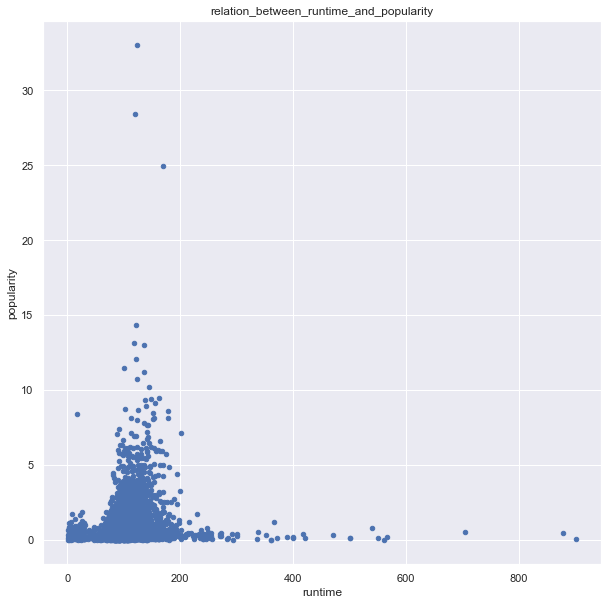

In [23]:
#scatter plot of coloumns(runtime and popularity)
df.plot(x='runtime', y='popularity', kind='scatter', figsize=(10,10))
plt.title('relation_between_runtime_and_popularity')
plt.xlabel('runtime')
plt.ylabel('popularity');



In [24]:
### as we can see it is not necessary that the films which have long runtime have more popular and 
##the most of films which have popularity its runtime from 0 to 200 

### Research Question 2  (Which genres are most interesting ?)

In [30]:
dm=df.groupby('genres').popularity.mean()
print(dm)

genres
Action             0.836394
Adventure          1.217868
Animation          0.810370
Comedy             0.537133
Crime              0.694063
Documentary        0.177023
Drama              0.552446
Family             0.730987
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468611
Music              0.447730
Mystery            0.596896
Romance            0.704157
Science Fiction    1.073096
TV Movie           0.246190
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64


Text(0, 0.5, 'popularity')

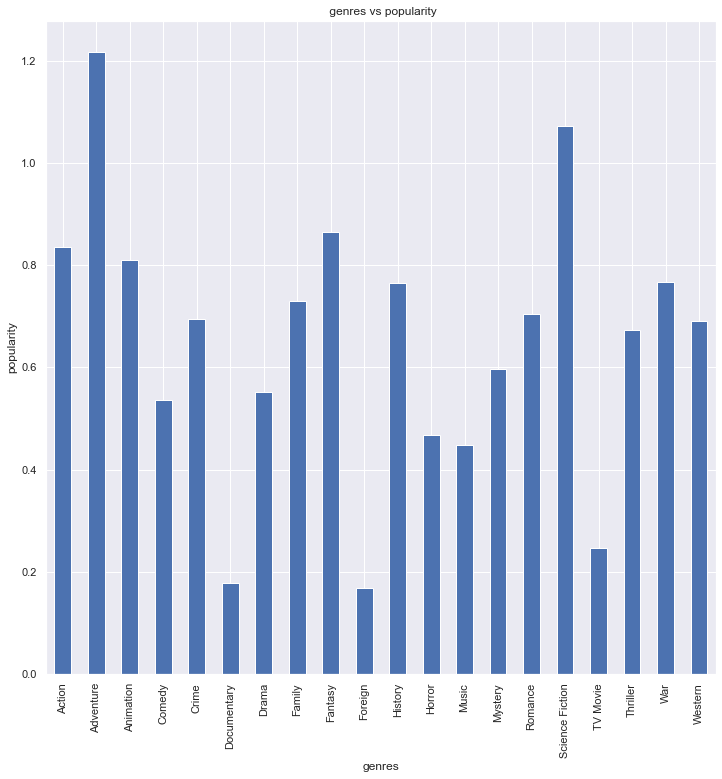

In [27]:
# plot relationship between popularity and genres
dm.plot( x='genres',y='popularity',kind='bar',title=' genres vs popularity', figsize=(12,12))
plt.xlabel('genres')
plt.ylabel('popularity')

In [ ]:
### as we can see the best genres of films are Adventure , Science Fiction and fantasy

In [ ]:
### Research Question 3 ( what are the best movies which have the highest revenue ?)  

In [32]:
##sum of revenue of each genre
df.groupby('genres').revenue_adj.sum()

genres
Action             2.057102e+11
Adventure          1.244029e+11
Animation          6.348280e+10
Comedy             2.350309e+11
Crime              3.783287e+10
Documentary        4.051546e+10
Drama              2.369239e+11
Family             2.205615e+10
Fantasy            3.818235e+10
Foreign            1.035696e+09
History            5.522705e+09
Horror             9.013522e+10
Music              1.094270e+10
Mystery            1.215351e+10
Romance            2.051991e+10
Science Fiction    3.407046e+10
TV Movie           8.919345e+09
Thriller           4.880848e+10
War                7.133705e+09
Western            4.403535e+09
Name: revenue_adj, dtype: float64

In [33]:
### as we can see (Horror,TV Movie,War ) films have the highest revenue 

<a id='conclusions'></a>
## Conclusions
***in this Tmdb Movies Dataset i asked and answered some questions , and I've come to several conclusions:
1) the most of films which have popularity its runtime from 0 to 200 

2) It was found that the three genres Adventure, Science Fiction and Fantasy were the most popular three genres for all the years.

3) the best movies which have the highest revenue are Horror,TV Movie,War films

